### Rename all images in the data folder

In [2]:
import glob
import os
from os.path import basename, splitext

imageFile = glob.glob("./data_inv/*.jpg")

l = len(imageFile)

for i in range(l):                          
    imageName = imageFile[i]
    os.rename(imageName, "./images/inverted_" + str(i)+'.jpg') 

### Rotate the images and save in a new folder

In [4]:
from PIL import Image
import cv2
images = glob.glob(r'./images/*.jpg')
l = len(images)
for i in range(l):
    colorImage  = Image.open(images[i])
    rotated     = colorImage.rotate(180)
    rotated = rotated.convert('RGB')
    rotated.save('./data_inv/inverted_'+str(i)+'.jpg')

### Spliting training data to get the testing data

In [ ]:
import shutil 
images = glob.glob(r'./images/*.jpg')
l = len(images)
for i in range(l):
    if i%10 == 0:
        shutil.move(images[i], './test') 

In [ ]:
import glob, shutil
images_inv = glob.glob(r'./data_inv/*.jpg')
l2 = len(images_inv)
for i in range(l2):
    if i%10 == 0:
        shutil.move(images_inv[i], './test') 

In [ ]:
import glob
import os
from os.path import basename, splitext

imageFile = glob.glob("./test/*.jpg")

l = len(imageFile)

for i in range(l):                          
    imageName = imageFile[i]
    if i%2 == 0:
        os.rename(imageName, "./test/" + str(i)+'.jpg') 
    else:
        os.rename(imageName, "./test/" + str(i)+'.jpg') 

### Widget to upload file

In [15]:
from ipywidgets import FileUpload
from IPython.display import display
upload = FileUpload(accept='.jpg', multiple=True)
display(upload)

FileUpload(value={}, accept='.jpg', description='Upload', multiple=True)

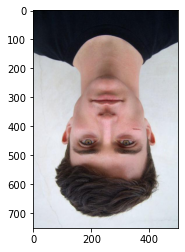

In [24]:
import io
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

for name, file_info in upload.value.items():
    img = Image.open(io.BytesIO(file_info['content']))
    imshow(np.asarray(img))

Testing Code

In [ ]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Random input image of a normal or inverted from the training set.
inverted_img_files = [os.path.join(train_inverted_dir, f) for f in train_inverted_fnames]
normal_img_files = [os.path.join(train_normal_dir, f) for f in train_normal_fnames]
img_path = random.choice(inverted_img_files + normal_img_files)
img = load_img(img_path, target_size=(150, 150))
x   = img_to_array(img)                          
x   = x.reshape((1,) + x.shape)                  
x /= 255.0
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1] 
        size       = feature_map.shape[ 1] 
        display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        x  = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )